In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import sys
sys.path.insert(1, '../src/')

from SEIR import *

In [2]:
backg_c = "midnightblue"
backg_c = "#000044"


## Datos Chile

In [13]:
df = pd.read_csv ("../data/COVID_Chile_Regiones.csv")
df = df.dropna(subset = ["Region"])
df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
df["Fecha_dt"][df["Fecha_dt"] >= '2020-03-18'] -=  pd.Timedelta(hours=12)

df = df.groupby("Fecha_dt", as_index=False).sum()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
df_c = df[df["Contagiados"] > 0]

In [16]:
df_c

,Fecha_dt,Contagiados,Muertes,Recuperados,Total_Contagiados
0,2020-03-07 00:00:00,7,0,0.0,7.0
1,2020-03-08 00:00:00,9,0,0.0,9.0
2,2020-03-09 00:00:00,12,0,0.0,12.0
3,2020-03-10 00:00:00,17,0,0.0,17.0
4,2020-03-11 00:00:00,23,0,0.0,23.0
5,2020-03-12 00:00:00,33,0,0.0,33.0
6,2020-03-13 00:00:00,43,0,0.0,43.0
7,2020-03-14 00:00:00,61,0,0.0,61.0
8,2020-03-15 00:00:00,75,0,0.0,75.0
9,2020-03-16 00:00:00,156,0,0.0,156.0


In [17]:
i_data = df_c["Contagiados"].values

x_times = (pd.DataFrame(df_c["Fecha_dt"] - df_c["Fecha_dt"].iloc[0])/np.timedelta64(1, 'D')).values.flatten()

print (i_data)
print (x_times)
x_times = x_times[i_data > 50]
i_ini = len(i_data) - len(x_times)
i_data = i_data[i_data > 50]
print (i_ini, i_data, df_c["Contagiados"].values[i_ini])
print (x_times)

[   7    9   12   17   23   33   43   61   75  156  201  238  342  434
  537  632  746  922 1142 1306 1610 1909 2139]
[ 0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5]
7 [  61   75  156  201  238  342  434  537  632  746  922 1142 1306 1610
 1909 2139] 61
[ 7.   8.   9.  10.  10.5 11.5 12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5
 20.5 21.5]


In [18]:
population = 480609
i0 = i_data[0]
s0 = population - i0
e0 = 0
r0 = 0

RMSE, beta, sigma, gamma = GridSearchSEIR (x_times, i_data, s0, e0, i0, r0, backward = True)
print (RMSE, beta, 1./sigma, 1./gamma)

16 16
211.48201394474304 1e-06 1.0 7.0


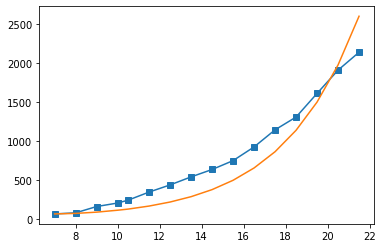

In [19]:
s_c, e_c, i_c, r_c = SEIR_backward(x_times, s0, e0, i0, r0, beta, sigma, gamma)

plt.plot (x_times, i_data, marker = "s")
plt.plot (x_times, i_c)

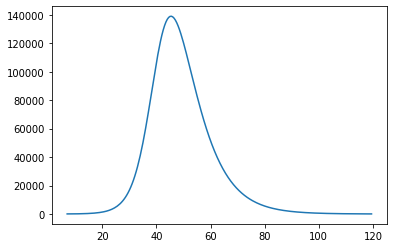

In [20]:
x_times_long = np.arange(x_times[0], 120, 0.5)
s_cl, e_cl, i_cl, r_cl = SEIR_backward(x_times_long, s0, e0, i0, r0, beta, sigma, gamma)

plt.plot (x_times_long, i_cl)

In [25]:
population = 480609
i0 = i_data[0]
s0 = population - i0
e0 = 0
r0 = 0

x_times_long = np.arange(0, 120, 1.)
r_times = np.arange(12, len (x_times)+1)
print (r_times)
Is = []

for i_t in r_times:
    RMSE, beta, sigma, gamma = GridSearchSEIR (x_times[:i_t], i_data[:i_t], s0, e0, i0, r0, backward = True)
    print (RMSE, beta, 1./sigma, 1./gamma)
    s_cl, e_cl, i_cl, r_cl = SEIR_backward(x_times_long, s0, e0, i0, r0, beta, sigma, gamma)
    Is.append (i_cl)


[12 13 14 15 16]
12 12
107.61619243333367 1e-06 0.5 6.0
13 13
127.57055094363639 1e-06 0.5 6.0
14 14
142.27503185412058 1e-06 0.5 5.5
15 15
165.18350613613273 1e-06 0.5 5.5
16 16
211.48201394474304 1e-06 1.0 7.0


120 120
120 120
120 120
120 120
120 120


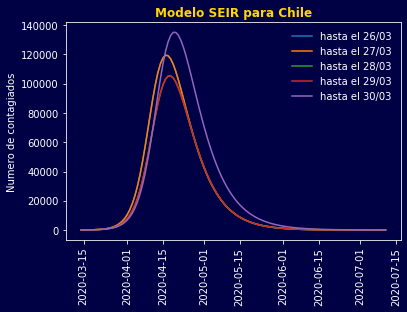

In [32]:
fig= plt.figure()
fig.patch.set_facecolor(backg_c)

x_plot = np.array([df_c["Fecha_dt"].iloc[i_ini] + datetime.timedelta(days=i) for i in x_times_long])

for i_ in range(len(r_times)):
    print (len(x_plot), len(i_cl))
    plt.plot (x_plot, Is[i_], label = "hasta el " + str(x_plot[r_times[i_]].strftime("%d/%m")))
#plt.xlabel ("Días desde el primer contagio")
plt.ylabel ("Numero de contagiados", color = "white")
plt.xticks (rotation = 90, color = "white")
plt.yticks (color = "white")
plt.title ("Modelo SEIR para Chile", color = "gold", weight = "bold")
axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')


120 120
120 120
120 120
120 120
120 120


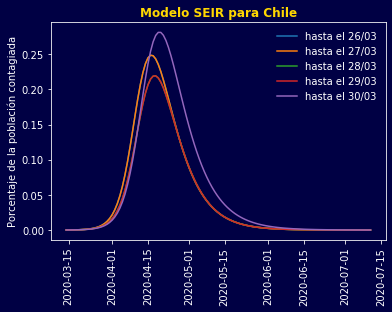

In [33]:
fig= plt.figure()

x_plot = np.array([df_c["Fecha_dt"].iloc[i_ini] + datetime.timedelta(days=i) for i in x_times_long])

for i_ in range(len(r_times)):
    print (len(x_plot), len(i_cl))
    plt.plot (x_plot, Is[i_]/population, label = "hasta el " + str(x_plot[r_times[i_]].strftime("%d/%m")))
#plt.xlabel ("Días desde el primer contagio")
plt.ylabel ("Porcentaje de la población contagiada", color = "white")
plt.xticks (rotation = 90, color = "white")
plt.yticks (color = "white")
plt.title ("Modelo SEIR para Chile", color = "gold", weight = "bold")
fig.patch.set_facecolor(backg_c)
axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')


120 120
120 120
120 120
120 120
120 120


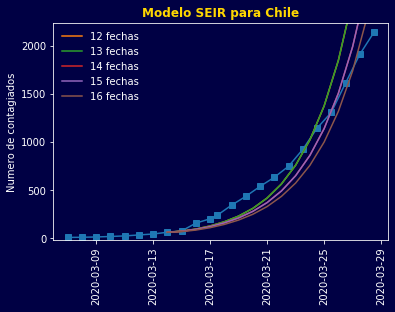

In [34]:
fig= plt.figure()

plt.plot (df_c["Fecha_dt"].values, df_c["Contagiados"].values, marker = "s")
for i_ in range(len(r_times)):
    print (len(x_plot), len(i_cl))
    plt.plot (x_plot, Is[i_], label = str(r_times[i_]) + " fechas")
plt.ylabel ("Numero de contagiados", color = "white")
plt.xticks (rotation = 90)
plt.xlim ((df_c["Fecha_dt"].iloc[0] - datetime.timedelta(days=1), 
           df_c["Fecha_dt"].iloc[-1] + datetime.timedelta(days=1)))
plt.ylim ((-20, df_c["Contagiados"].values[-1] + 100))
plt.title ("Modelo SEIR para Chile", color = "gold", weight = "bold")

fig.patch.set_facecolor(backg_c)
axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')